In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures 
import statsmodels.api as sm
from regressors.regressors import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df_CA = pd.read_excel('CA.xlsx')
df_GB = pd.read_excel('GB.xlsx')
df_US = pd.read_excel('US.xlsx')
df_CA.head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,publish_date
0,0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,2017-11-10
1,1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,2017-11-13
2,2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2017-11-12
3,3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,2017-11-12
4,4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,2017-11-09


In [3]:
title_US = df_US['title']
tags_US = df_US['tags']
views_US = df_US['views']
likes_US = df_US['likes']
comment_count_US = df_US['comment_count']
dislikes_US = df_US['dislikes']
description_US = df_US['description']

title_CA = df_CA['title']
tags_CA = df_CA['tags']
views_CA = df_CA['views']
likes_CA = df_CA['likes']
comment_count_CA = df_CA['comment_count']
dislikes_CA = df_CA['dislikes']
description_CA = df_CA['description']

title_GB = df_GB['title']
tags_GB = df_GB['tags']
views_GB = df_GB['views']
likes_GB = df_GB['likes']
comment_count_GB = df_GB['comment_count']
dislikes_GB = df_GB['dislikes']
description_GB = df_GB['description']

title_CA.head()

0           Eminem - Walk On Water (Audio) ft. Beyoncé
1                        PLUSH - Bad Unboxing Fan Mail
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                             I Dare You: GOING BALD!?
4          Ed Sheeran - Perfect (Official Music Video)
Name: title, dtype: object

In [4]:
title_US_length = []
spe_cha = '~`!@#$%^&*()_-+={}[]|\/:""<>,.;?'
for i in range(39065):
    lines = title_US[i]
    for ch in spe_cha:  
        lines = lines.replace(ch," ")
    words = lines.split()
    title_US_length.append(len(words))
#print (title_US_length)

In [5]:
tags_US_length = []
for i in range(39065):
    tag = tags_US[i]
    ts = tag.count('|') + 1
    tags_US_length.append(ts)
    #print (ts)

In [6]:
des_US_length = []
for i in range(39065):
    string = description_US[i]
    string = re.sub(r'\\n','\n',string)
    string = re.sub(r'-','\n',string)
    results = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*', re.S)
    string = re.sub(results,'',string)
    string.rstrip() 
    for ch in '~`!@#$%^&*()_-+={}[]|\/:""<>,.;?':
        string = string.replace(ch," ")
    words = string.split()
    #print(len(words))
    des_US_length.append(len(words))
    #print(len(words))

In [7]:
title_US_length = pd.DataFrame(title_US_length,columns = ['title_len'])
des_US_length = pd.DataFrame(des_US_length,columns = ['des_len'])
tags_US_length = pd.DataFrame(tags_US_length,columns = ['tags_len'])

In [8]:
result1_US = pd.concat([df_US, title_US_length], axis=1, join='inner')
result2_US = pd.concat([result1_US, tags_US_length], axis=1, join='inner')
result3_US = pd.concat([result2_US, des_US_length], axis=1, join='inner')

In [9]:
result3_US.corr()

,category_id,views,likes,dislikes,comment_count,title_len,tags_len,des_len
category_id,1.00,-0.17,-0.18,-0.05,-0.09,0.07,0.15,0.08
views,-0.17,1.00,0.85,0.56,0.66,-0.05,-0.04,-0.03
likes,-0.18,0.85,1.00,0.52,0.85,-0.09,-0.07,-0.04
dislikes,-0.05,0.56,0.52,1.00,0.62,-0.03,-0.01,-0.02
comment_count,-0.09,0.66,0.85,0.62,1.00,-0.07,-0.03,-0.02
title_len,0.07,-0.05,-0.09,-0.03,-0.07,1.00,0.14,0.09
tags_len,0.15,-0.04,-0.07,-0.01,-0.03,0.14,1.00,0.29
des_len,0.08,-0.03,-0.04,-0.02,-0.02,0.09,0.29,1.00


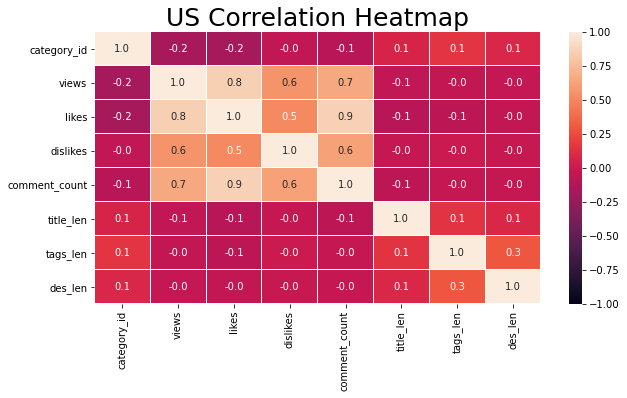

In [10]:
fig, axes = plt.subplots(figsize = (10,5))
sns.heatmap(result3_US.corr(), ax = axes, fmt = '.1f', annot= True, linewidths =.05,vmin = -1, vmax= 1).set_title('US Correlation Heatmap',fontsize = '25')
plt.show()

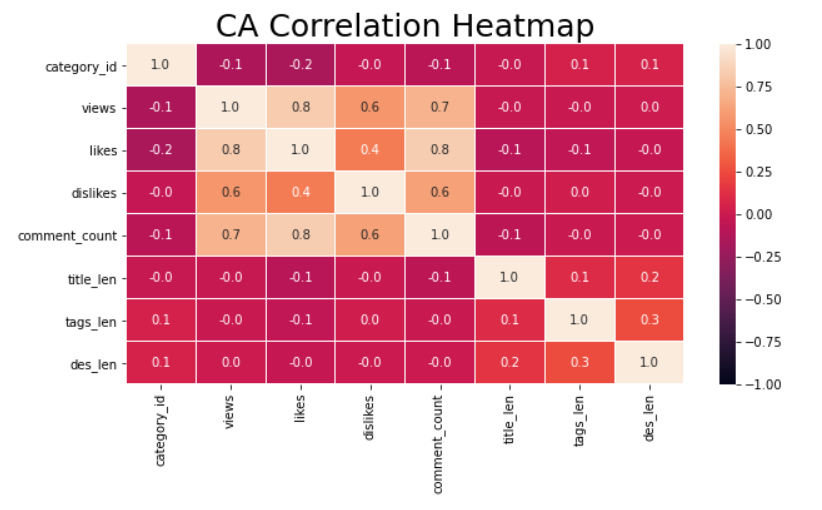

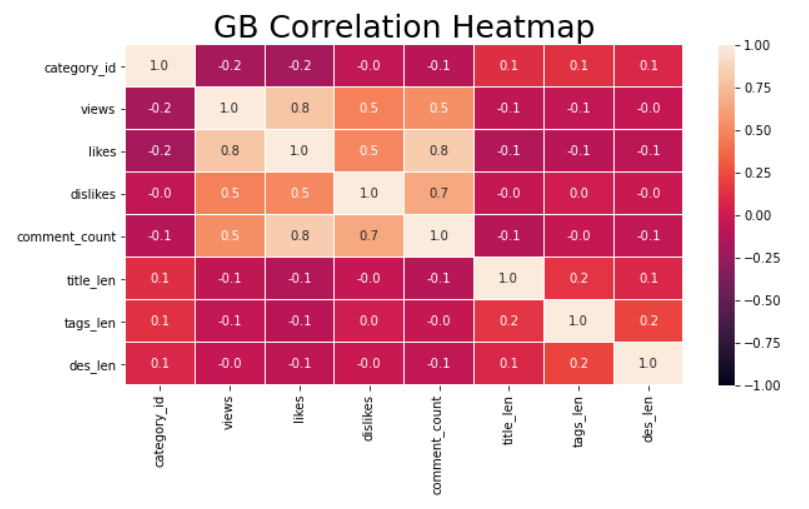

In [11]:
tr_ar = np.array(df_US)
title_US_length = np.array(title_US_length).reshape(-1,1)
tags_US_length = np.array(tags_US_length).reshape(-1,1)
des_US_length = np.array(des_US_length).reshape(-1,1)
views_US = np.array(views_US).reshape(-1,1)
likes_US = np.array(likes_US).reshape(-1,1)
dislikes_US = np.array(dislikes_US).reshape(-1,1)
comment_count_US = np.array(comment_count_US).reshape(-1,1)

R squared: 0.72240255


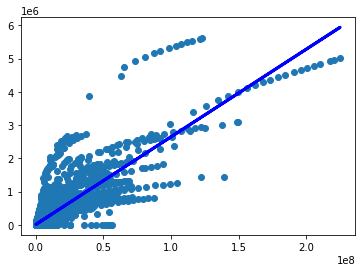

In [12]:
regr = linear_model.LinearRegression()
regr.fit(views_US,likes_US) #拟合（x,y）
y_pred = regr.predict(views_US)
print('R squared: %.8f' % r2_score(likes_US, y_pred))
# Plot outputs
plt.scatter(views_US,likes_US)
plt.plot(views_US, y_pred, color='blue', linewidth=3)

CA: R squared: 0.69270533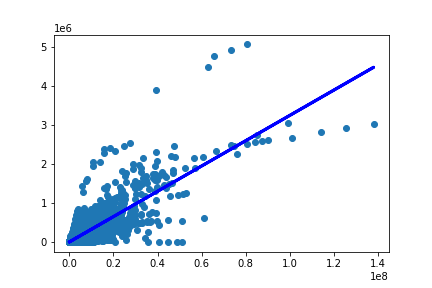

GB: R squared: 0.63559642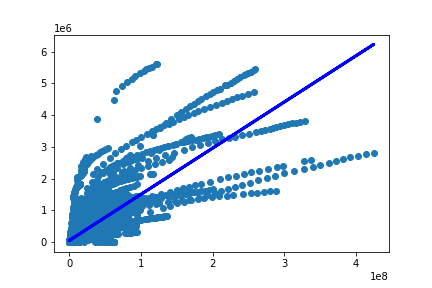

R squared: 0.43102542


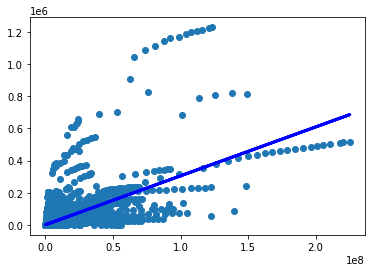

In [13]:
regr = linear_model.LinearRegression()
regr.fit(views_US,comment_count_US) #拟合（x,y）
y_pred = regr.predict(views_US)
print('R squared: %.8f' % r2_score(comment_count_US, y_pred))
# Plot outputs
plt.scatter(views_US,comment_count_US)
plt.plot(views_US, y_pred, color='blue', linewidth=3)

CA: R squared:0.50281408 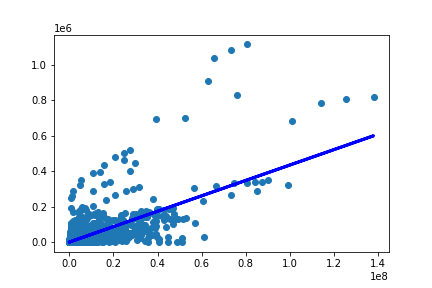

GB: R squared: 0.28789386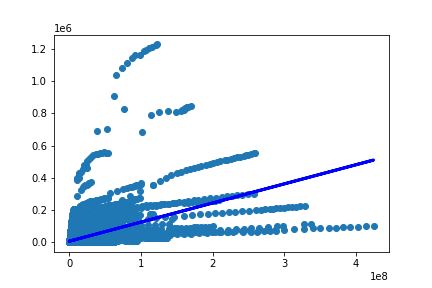

R squared: 0.31256329


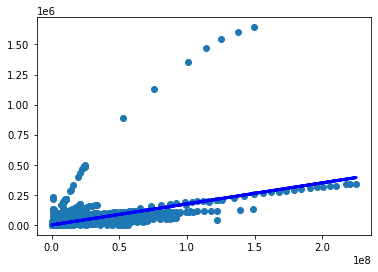

In [14]:
regr = linear_model.LinearRegression()
regr.fit(views_US,dislikes_US) #拟合（x,y）
y_pred = regr.predict(views_US)
print('R squared: %.8f' % r2_score(dislikes_US, y_pred))
# Plot outputs
plt.scatter(views_US,dislikes_US)
plt.plot(views_US, y_pred, color='blue', linewidth=3)

CA: R squared:0.31651747 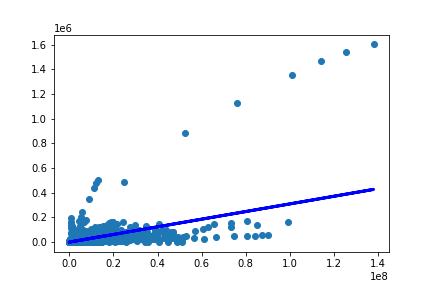

GB: R squared: 0.22706408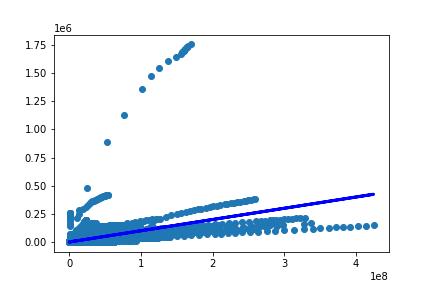

R squared: 0.08574669


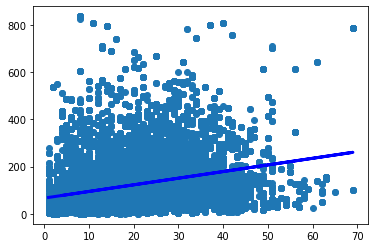

In [15]:
regr = linear_model.LinearRegression()
regr.fit(tags_US_length,des_US_length) #拟合（x,y）
y_pred = regr.predict(tags_US_length)
print('R squared: %.8f' % r2_score(des_US_length,y_pred))
# Plot outputs
plt.scatter(tags_US_length,des_US_length)
plt.plot(tags_US_length, y_pred, color='blue', linewidth=3)

CA: R squared: 0.06366117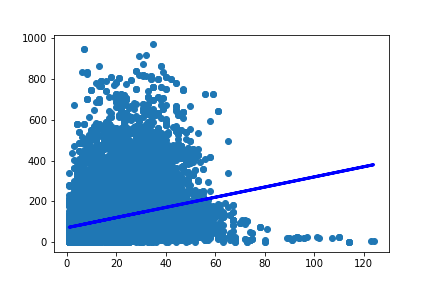

GB: R squared: 0.04785860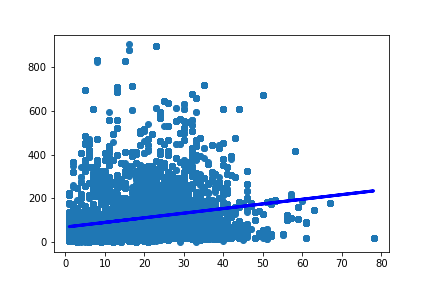

R squared: 0.00854602


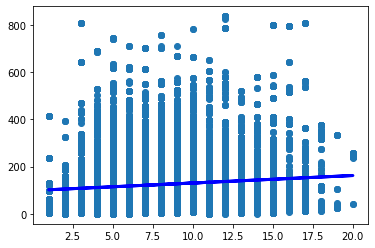

In [16]:
regr = linear_model.LinearRegression()
regr.fit(title_US_length,des_US_length) #拟合（x,y）
y_pred = regr.predict(title_US_length)
print('R squared: %.8f' % r2_score(des_US_length,y_pred))
# Plot outputs
plt.scatter(title_US_length,des_US_length)
plt.plot(title_US_length, y_pred, color='blue', linewidth=3)

CA: R squared:0.02383270 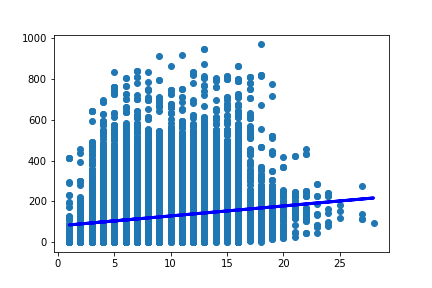

GB: R squared:0.00623854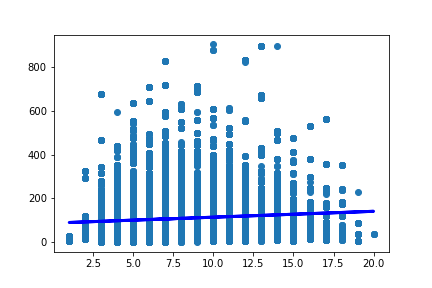

R squared: 0.01979857


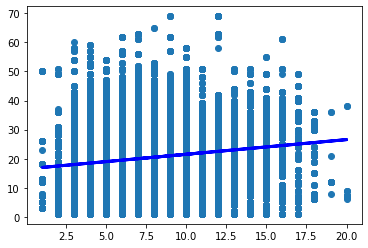

In [17]:
regr = linear_model.LinearRegression()
regr.fit(title_US_length,tags_US_length) #拟合（x,y）
y_pred = regr.predict(title_US_length)
print('R squared: %.8f' % r2_score(tags_US_length, y_pred))
# Plot outputs
plt.scatter(title_US_length,tags_US_length)
plt.plot(title_US_length, y_pred, color='blue', linewidth=3)

CA: R squared: 0.01135665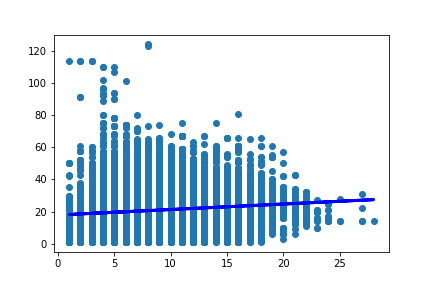

GB: R squared:0.02333889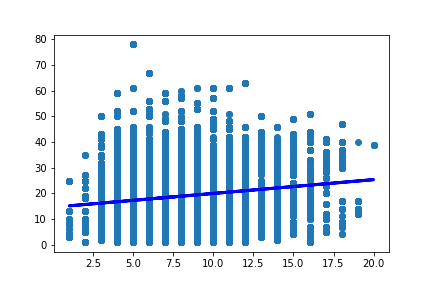

In [18]:
for i in range(1,20):
    poly_reg =PolynomialFeatures(degree=i)
    x_ploy = poly_reg.fit_transform(title_US_length)
    regr = linear_model.LinearRegression()
    regr.fit(x_ploy,views_US)
    y_train_pred =  regr.predict(x_ploy)
    score = regr.score(x_ploy, views_US)
    
    print ('\n')
    print('==================          一元 %s 次多项式回归结果           ================='%(i))
    print ('\n')
    print("model coefficients", regr.coef_)
    print("model intercept", regr.intercept_)

    x = sm.add_constant(x_ploy)
    reg = sm.OLS(views_US, x).fit()
   
    print(reg.summary())
    print ('\n')



==================          一元 1 次多项式回归结果           =================


model coefficients [[      0.         -121375.34666543]]
model intercept [3370450.79267025]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     107.3
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           4.09e-25
Time:                        20:37:27   Log-Likelihood:            -6.7394e+05
No. Observations:               39065   AIC:                         1.348e+06
Df Residuals:                   39063   BIC:                         1.348e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t 



==================          一元 8 次多项式回归结果           =================


model coefficients [[ 0.00000000e+00  9.91229783e+06 -5.24352449e+06  1.47505656e+06
  -2.35148125e+05  2.17778812e+04 -1.15962088e+03  3.29297042e+01
  -3.86553873e-01]]
model intercept [-5372764.25822077]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     25.05
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           6.58e-39
Time:                        20:37:28   Log-Likelihood:            -6.7389e+05
No. Observations:               39065   AIC:                         1.348e+06
Df Residuals:                   39056   BIC:                         1.348e+06
Df Model:                           8                                         
Covarian

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.83
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           6.90e-22
Time:                        20:37:28   Log-Likelihood:            -6.7393e+05
No. Observations:               39065   AIC:                         1.348e+06
Df Residuals:                   39056   BIC:                         1.348e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        502.4650     45.387     11.071      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.027
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    -148.7
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               1.00
Time:                        20:37:28   Log-Likelihood:            -6.7452e+05
No. Observations:               39065   AIC:                         1.349e+06
Df Residuals:                   39057   BIC:                         1.349e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.05e-07   6.05e-09     33.861      0.0